In [7]:
import os
import pandas as pd
import numpy as np
import Data_Savior_J
from Data_Savior_J import load_file
import scipy as sp
from scipy import signal
from ml_time_series import generate_envelope

In [72]:
files = ['data_154743','data_155334','data_155743','data_161034', 'data_161420']

DATAFILE = np.load('DB_HAND/'+files[4]+'.npy')
df = pd.DataFrame(DATAFILE, columns=['Sample','Label'])

df.head()

,Sample,Label
0,514.0,0.0
1,522.0,0.0
2,512.0,0.0
3,507.0,0.0
4,522.0,0.0


In [73]:
DATAFILE.shape

(30000, 2)

<IPython.core.display.Javascript object>


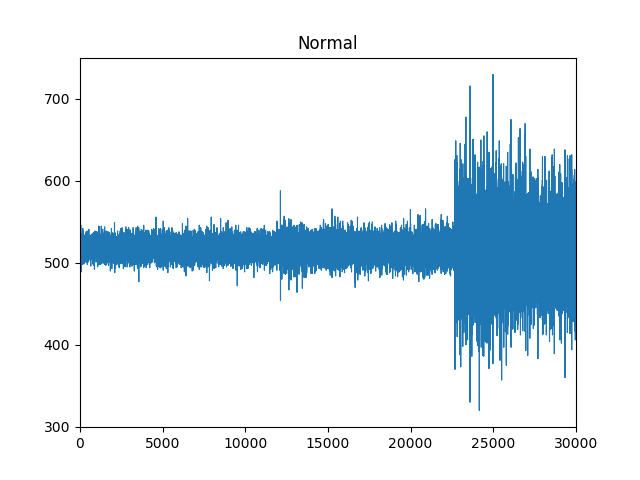

In [74]:
%matplotlib notebook
import matplotlib.pyplot as plt

df['Sample'].plot(linewidth=0.8)
plt.title('Normal')

---
# Processing
---

In [23]:
def proccess_data(file_,DATA):
    
    #datafile = os.path.join(DATADIR, DATAFILE)
    #datafile = DATAFILE

    # Remove header, Nan and trash
    data = np.load('DB_HAND/'+file_+'.npy')
    Xc_1 = data[:10000 ,0]
    Xc_2 = data[10000:20000 ,0]
    Xc_3 = data[20000: ,0]
    
    print '\nXc_1 cleaned shape ', Xc_1.shape
    print 'Xc_2 cleaned shape ', Xc_2.shape
    print 'Xc_3 cleaned shape ', Xc_3.shape
    
    #Create temporal serie
    NUM_SAMPLES = 50
    
    Xc_1 = generate_envelope(Xc_1, NUM_SAMPLES)
    Xc_2 = generate_envelope(Xc_2, NUM_SAMPLES)
    Xc_3 = generate_envelope(Xc_3, NUM_SAMPLES)
    
    print 'Xc_1 temporal-serie shape ', Xc_1.shape
    print 'Xc_2 temporal-serie shape ', Xc_2.shape
    print 'Xc_3 temporal-serie shape ', Xc_3.shape
    
    #Labeling the type of movement
    C = (np.ones(len(Xc_1))*0).reshape((len(Xc_1),1))
    Xc_1 = np.hstack((Xc_1.reshape(Xc_1.shape),C.reshape((len(Xc_1),1))))


    C = (np.ones(len(Xc_2))*1).reshape((len(Xc_2),1))
    Xc_2 = np.hstack((Xc_2.reshape(Xc_2.shape),C.reshape((len(Xc_2),1))))
    
    C = (np.ones(len(Xc_3))*2).reshape((len(Xc_3),1))
    Xc_3 = np.hstack((Xc_3.reshape(Xc_3.shape),C.reshape((len(Xc_3),1))))
    
    print 'Xc_1 labeled shape ', Xc_1.shape
    print 'Xc_2 labeled shape ', Xc_2.shape
    print 'Xc_3 labeled shape ', Xc_3.shape
    
    # Salving in file on the folder <classifier_data>
    from Data_Savior_J import save_it_now
    save_it_now(Xc_1, './preprocessed_data/'+file_+'_honp.'+'data')
    print file_+'_o.'+'data'
    
    save_it_now(Xc_2, './preprocessed_data/'+file_+'_hclp.'+'data')
    print file_+'_cmf.'+'data'
    
    save_it_now(Xc_3, './preprocessed_data/'+file_+'_hchp.'+'data')
    print file_+'_ctf.'+'data'
    
    DATA.append(file_+'_honp.'+'data')
    DATA.append(file_+'_hclp.'+'data')
    DATA.append(file_+'_hchp.'+'data')

In [24]:
files = ['data_154743','data_155334','data_155743','data_161034', 'data_161420']
DATA = []
for i in files:
    proccess_data(i,DATA)


Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc_1 labeled shape  (9951, 51)
Xc_2 labeled shape  (9951, 51)
Xc_3 labeled shape  (9951, 51)
Saved to file
data_154743_o.data
Saved to file
data_154743_cmf.data
Saved to file
data_154743_ctf.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc_1 labeled shape  (9951, 51)
Xc_2 labeled shape  (9951, 51)
Xc_3 labeled shape  (9951, 51)
Saved to file
data_155334_o.data
Saved to file
data_155334_cmf.data
Saved to file
data_155334_ctf.data

Xc_1 cleaned shape  (10000,)
Xc_2 cleaned shape  (10000,)
Xc_3 cleaned shape  (10000,)
Xc_1 temporal-serie shape  (9951, 50)
Xc_2 temporal-serie shape  (9951, 50)
Xc_3 temporal-serie shape  (9951, 50)
Xc

In [25]:
Xc = load_file("preprocessed_data/"+DATA[0])
for i in DATA[1:]:
    Xc = np.vstack((Xc,load_file("preprocessed_data/"+i))) 

In [26]:
Xc

array([[ 484.,  493.,  506., ...,  510.,  500.,    0.],
       [ 493.,  506.,  490., ...,  500.,  513.,    0.],
       [ 506.,  490.,  512., ...,  513.,  529.,    0.],
       ..., 
       [ 489.,  482.,  557., ...,  486.,  461.,    2.],
       [ 482.,  557.,  598., ...,  461.,  510.,    2.],
       [ 557.,  598.,  560., ...,  510.,  525.,    2.]])

In [27]:
X = Xc[:,0:(Xc.shape[1]-2)]

yz = Xc[:,[(Xc.shape[1]-1)]]
y = np.array([])
for i in range(len(yz)):
    y = np.hstack((y,yz[i]))

X.shape, y.shape

((149265, 49), (149265,))

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.25, 
                                                    random_state=10)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
print X_train_std.shape

(111948, 51)


# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

print 'Training time'
%time rfc = rfc.fit(X_train_std, y_train)

print''

print 'Predict time'
%time y_pred = rfc.predict(X_test_std)

print''

from sklearn.metrics import accuracy_score
print ('ClassifyRF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Training time
CPU times: user 36.2 s, sys: 56 ms, total: 36.2 s
Wall time: 36.2 s

Predict time
CPU times: user 468 ms, sys: 16 ms, total: 484 ms
Wall time: 484 ms

ClassifyRF accuracy:---------->100.00 %


## Confusion Matrix

<IPython.core.display.Javascript object>


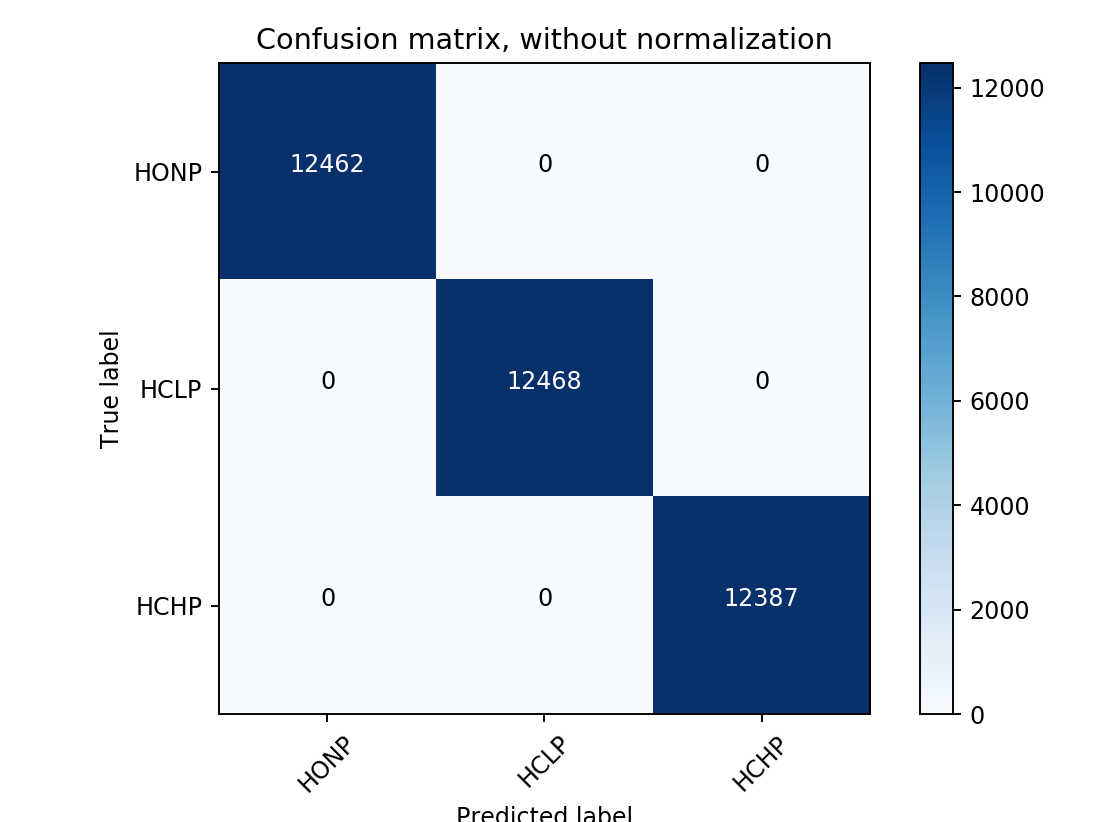

Confusion matrix, without normalization
[[12462     0     0]
 [    0 12468     0]
 [    0     0 12387]]


<IPython.core.display.Javascript object>


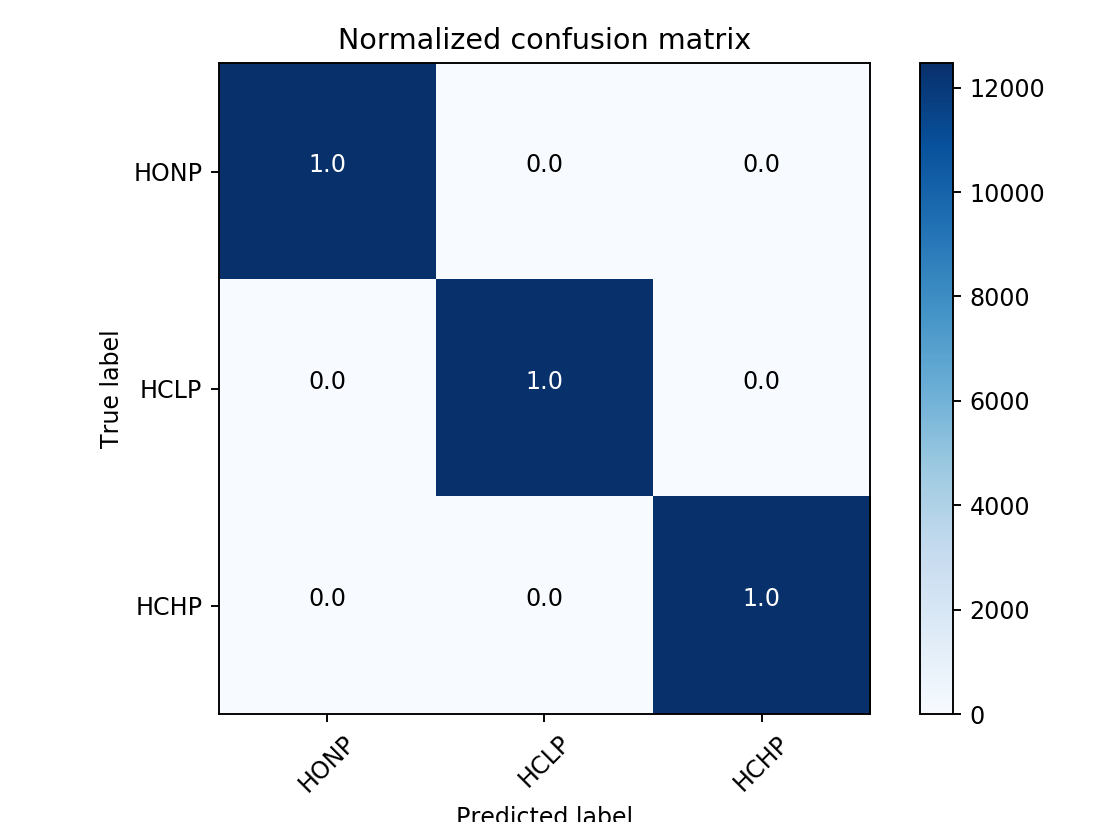

Normalized confusion matrix
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [55]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

%matplotlib notebook
class_names = np.array(['HONP', 'HCLP', 'HCHP'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


# Support Vector Machine

In [77]:
from sklearn import svm, datasets

print 'Processing time RBF'
%time svm = svm.SVC(kernel='rbf', gamma=0.2, C=6, decision_function_shape='ovr').fit(X_train_std, y_train)

print ''

from sklearn.metrics import accuracy_score

print 'Predict time'  
%time y_pred = svm.predict(X_test_std)
from sklearn.metrics import accuracy_score
print ('SVM-RBF accuracy:---------->%.2f %%' % (accuracy_score(y_test, y_pred)*100))

Processing time RBF
CPU times: user 24min 31s, sys: 680 ms, total: 24min 32s
Wall time: 24min 32s

Predict time
CPU times: user 1min 8s, sys: 12 ms, total: 1min 8s
Wall time: 1min 8s
SVM-RBF accuracy:---------->98.27 %


## Confusion Matrix

<IPython.core.display.Javascript object>


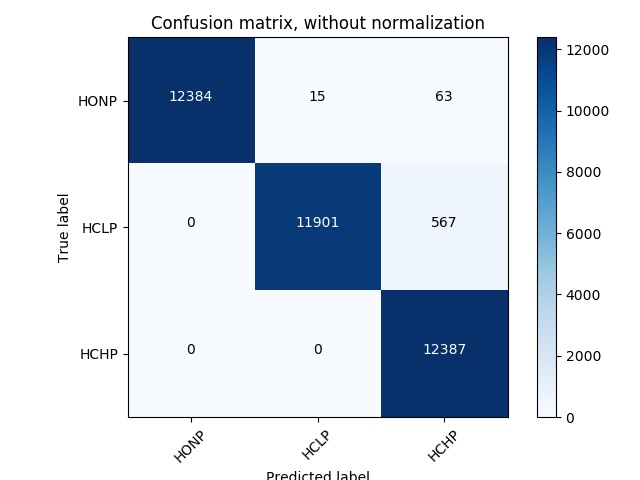

Confusion matrix, without normalization
[[12384    15    63]
 [    0 11901   567]
 [    0     0 12387]]


<IPython.core.display.Javascript object>


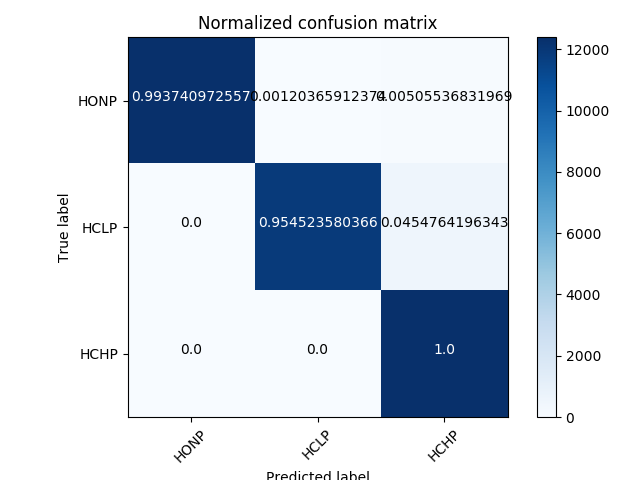

Normalized confusion matrix
[[ 0.99  0.    0.01]
 [ 0.    0.95  0.05]
 [ 0.    0.    1.  ]]


In [78]:
from sklearn.metrics import confusion_matrix
import itertools

%matplotlib notebook
class_names = np.array(['HONP', 'HCLP', 'HCHP'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()